In [212]:
# In this tutorial we will see how to use logistic regression for multiclass classification.


from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [15]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

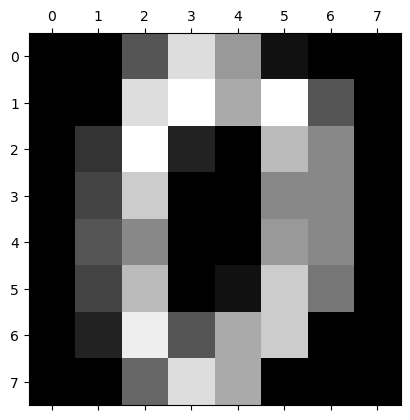

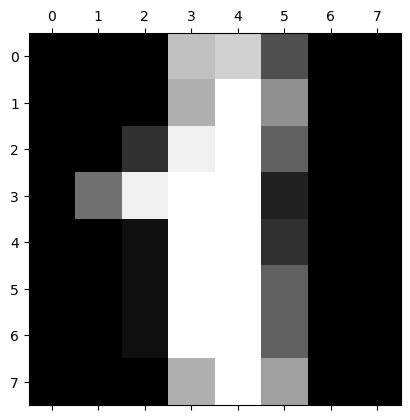

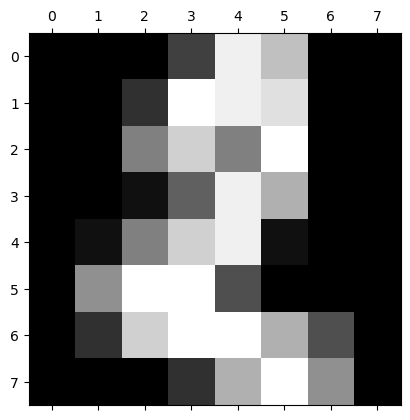

In [43]:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [49]:
digits.target[0:3]

array([0, 1, 2])

### Create and train logistic regression model



In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [180]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=.20)

# Scaleing the data beacuse of error (TOTAL NO. of ITERATIONS REACHED LIMIT.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [182]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [184]:
model.score(X_test,y_test)

0.7527777777777778

In [140]:
# now predict values or check model

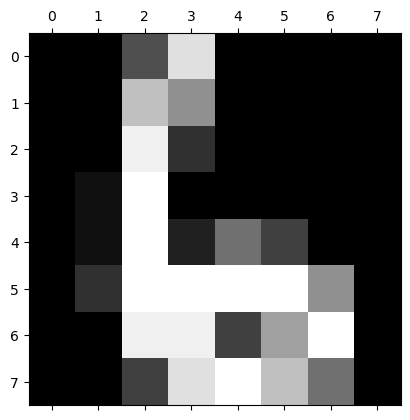

In [156]:
plt.matshow(digits.images[67])

In [146]:
digits.target[67]

6

In [160]:
model.predict([digits.data[67]])

array([6])

In [186]:
model.predict(digits.data[0:5])

array([0, 1, 1, 3, 1])

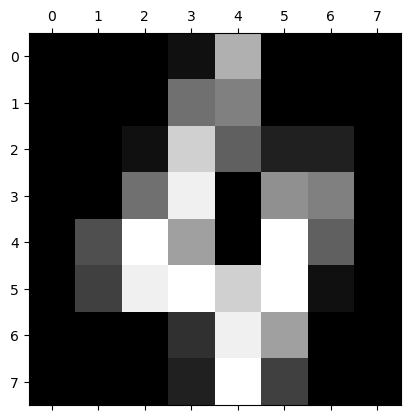

In [178]:
plt.matshow(digits.images[4])

### Confusion Matrix 

In [202]:
# need where the model is failed

y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [204]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[34,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0, 23,  0,  0,  0,  0,  2,  5],
       [ 0, 25,  0,  0,  7,  0,  3,  0,  0,  3],
       [ 0,  5,  0,  0,  0, 24,  0,  0,  0,  5],
       [ 0,  4,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0, 16,  0,  1],
       [ 0, 15,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0, 36]])

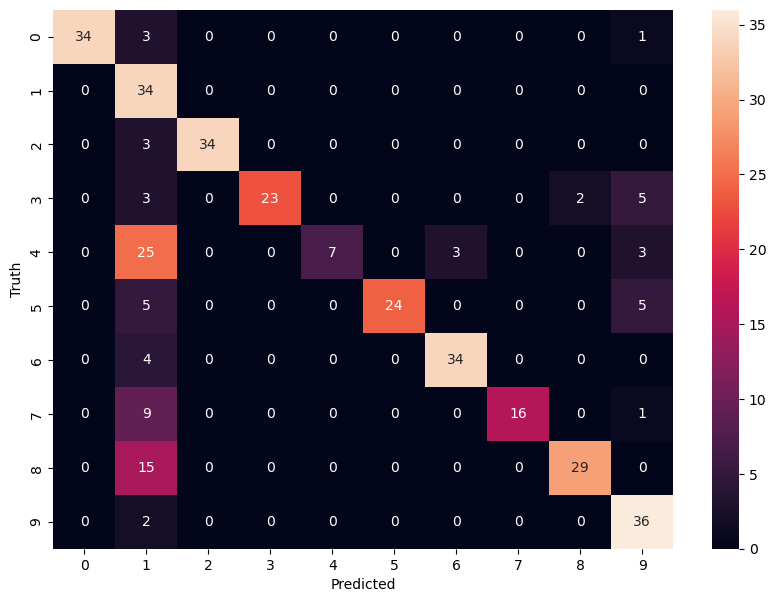

In [208]:
# visulazation to get more clearity

import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()